# Notebook 07: Biological Insights & Interpretation

**Objective**: Extract biological meaning from annotated cell types through comparative analysis.

## What you will learn:
- Compare gene expression between cell types
- Identify cell type-specific signatures
- Visualize key biological markers
- Interpret functional differences

## From Annotation to Understanding

We now have annotated cell types, but what makes them **functionally different**?

**Questions we'll answer**:
- What genes distinguish CD4+ from CD8+ T cells?
- What are the unique functions of NK cells vs T cells?
- How do monocyte subtypes differ?
- What biological processes define each cell type?

## Workflow:
1. Load annotated data
2. Compare cell types (pairwise differential expression)
3. Visualize cell type-specific markers
4. Create comprehensive marker heatmaps
5. Analyze functional gene sets
6. Generate figures
7. Export results for reporting

In [12]:
# Import libraries
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Scanpy
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor='white')

# Paths
data_dir = '../data/'
results_dir = '../results/'

print("Libraries imported successfully!")
print(f"Scanpy version: {sc.__version__}")

Libraries imported successfully!
Scanpy version: 1.11.4


## 1. Load Annotated Data

Load the final annotated dataset from Notebook 06.

In [13]:
# Load annotated data
adata = sc.read_h5ad(f'{data_dir}pbmc3k_annotated.h5ad')

print("=" * 60)
print("LOADED DATA")
print("=" * 60)
print(adata)
print(f"\n📊 Dimensions: {adata.shape[0]} cells × {adata.shape[1]} genes")
print(f"🧬 Cell types: {adata.obs['cell_type_merged'].nunique()}")
print(f"\nCell type composition:")
print(adata.obs['cell_type_merged'].value_counts())

LOADED DATA
AnnData object with n_obs × n_vars = 2134 × 13671
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_1.0', 'leiden_0.4', 'leiden_0.8', 'leiden_1.5', 'leiden_2.0', 'leiden', 'cell_type', 'cell_type_merged'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_type_colors', 'cell_type_merged_colors', 'dendrogram_cell_type_merged', 'dendrogram_leiden', 'hvg', 'leiden_0.4', 'leiden_0.4_colors', 'leiden_0.8', 'leiden_0.8_colors', 'leiden_1.0', 'leiden_1.0_colors', 'leiden_1.5', 'leiden_1.5_colors', 'leiden_2.0', 'leiden_2.0_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

📊 Dimensions: 2134 cells × 13671 genes
🧬 Cell types: 6

Cell type composition:
cell_t

## 2. Overview UMAP with Cell Types

Visualize the final annotated landscape.

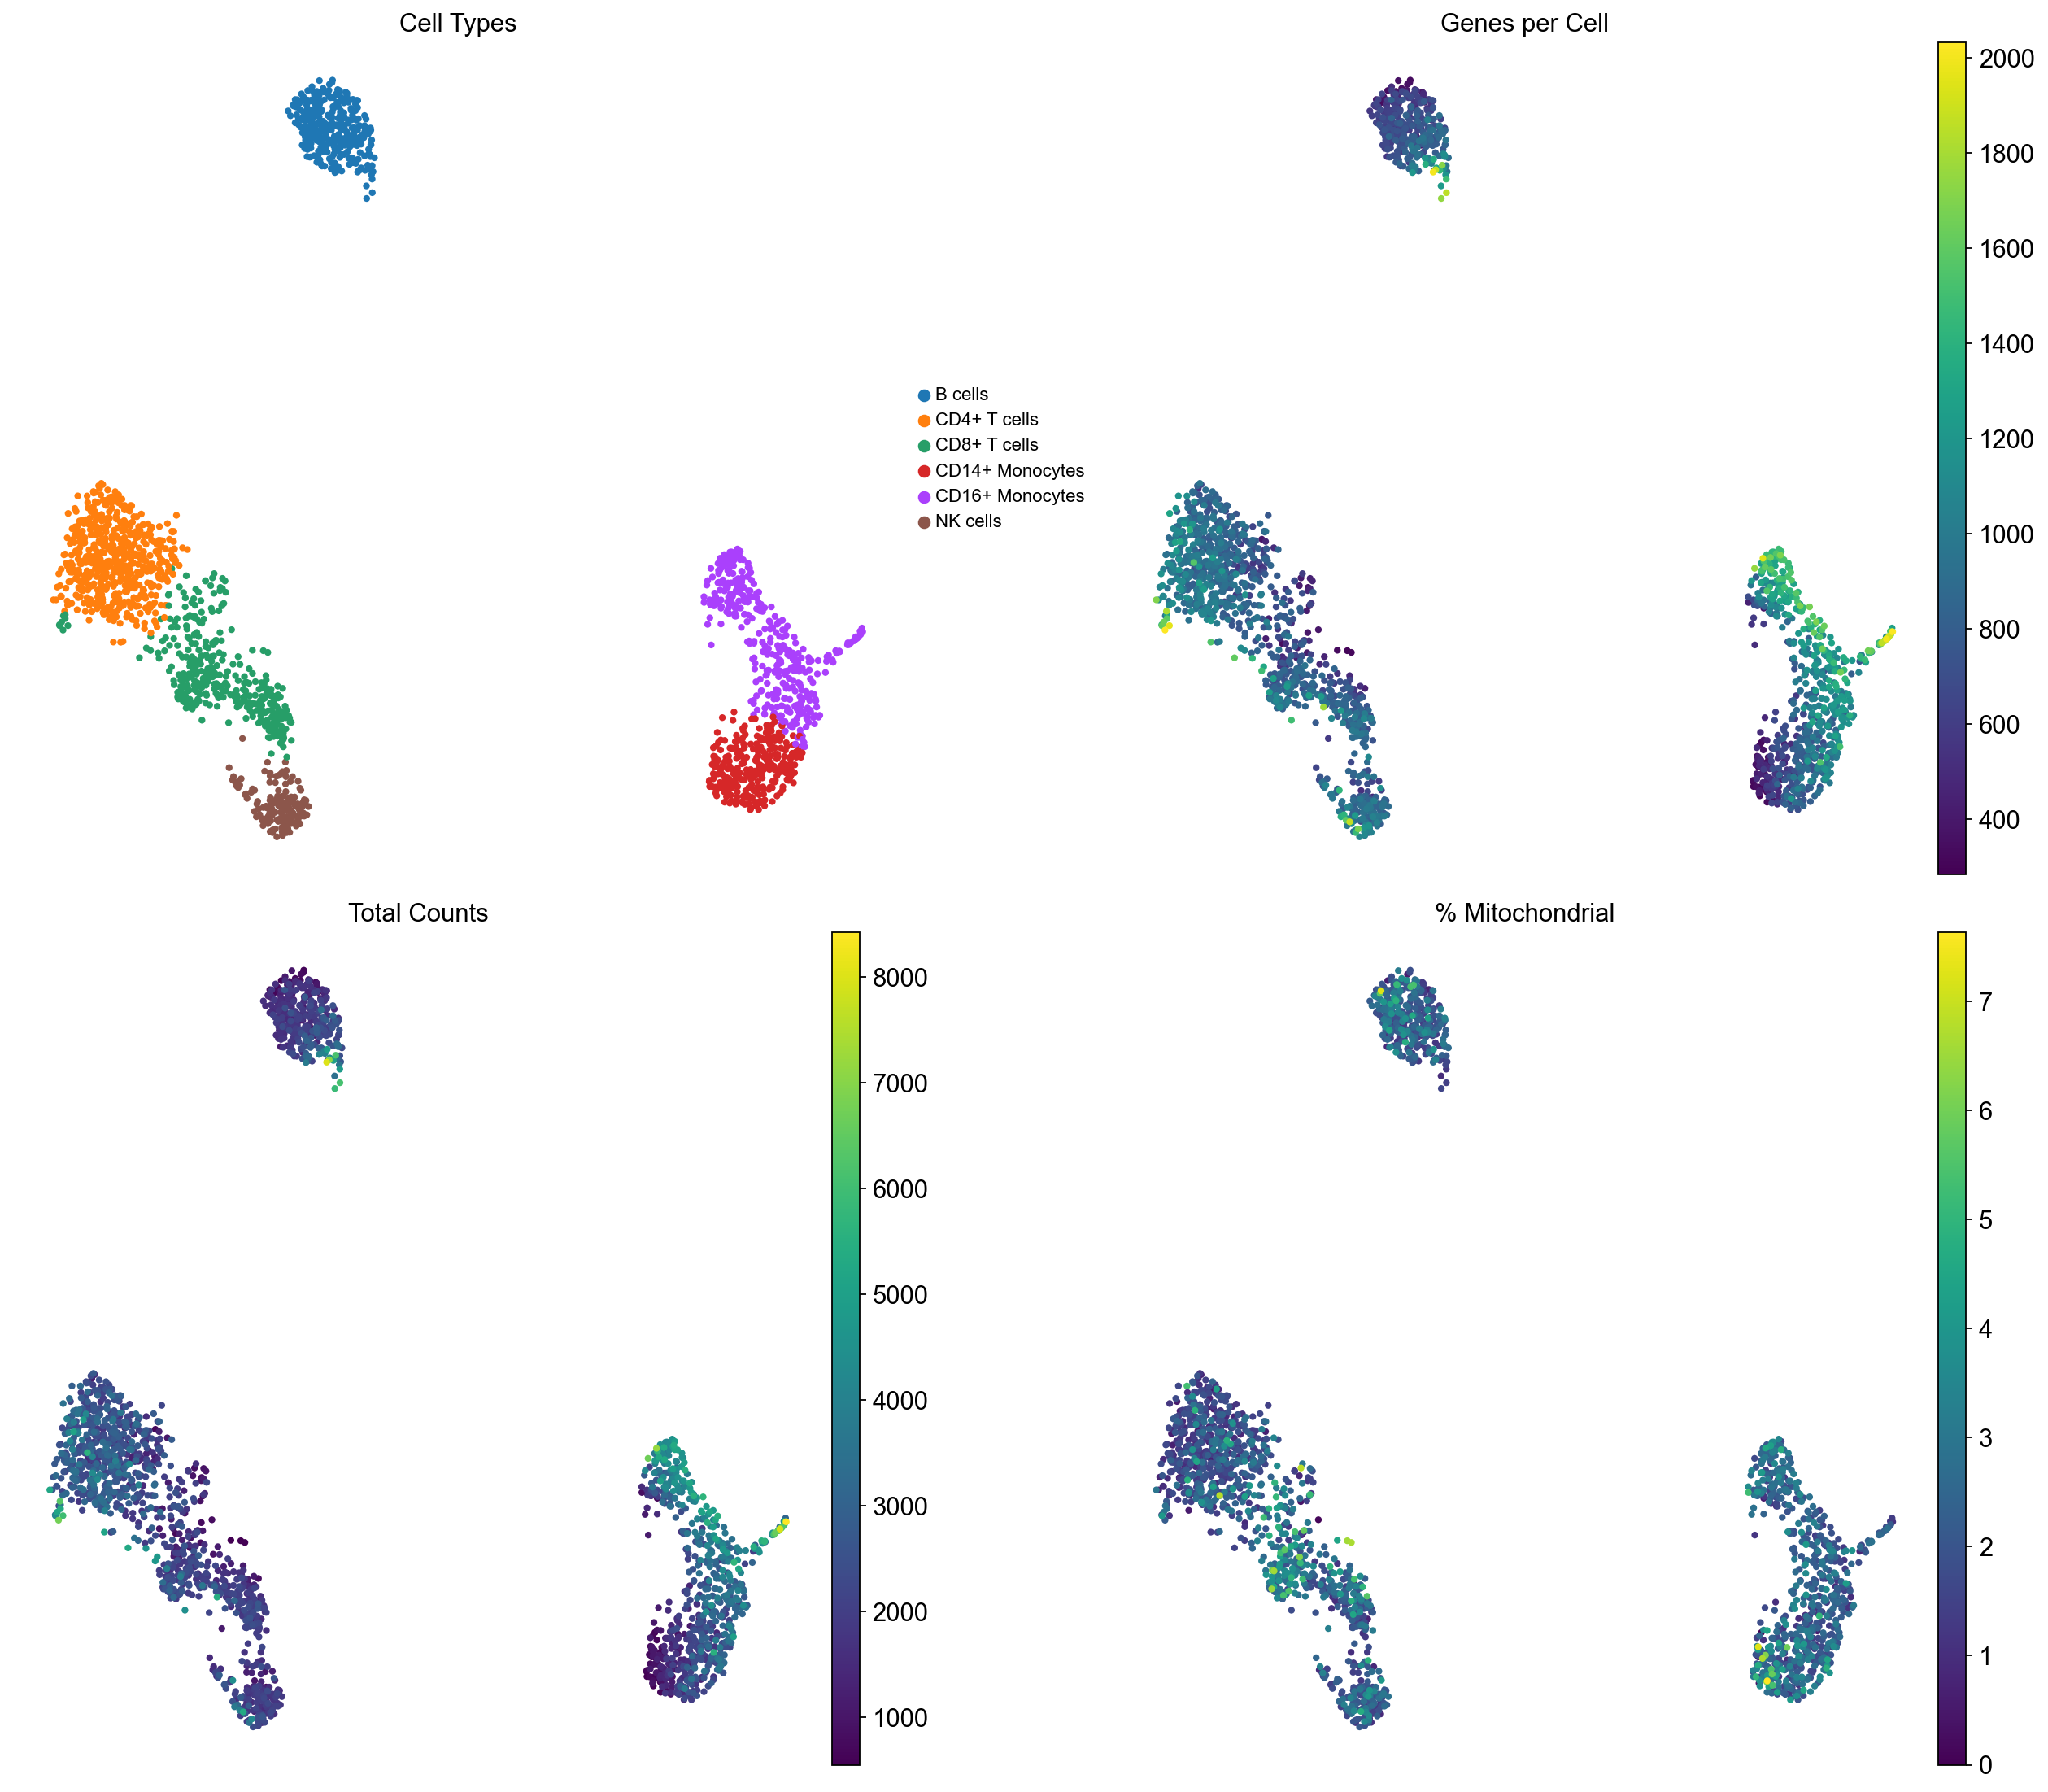

Comprehensive UMAP overview created


In [14]:
# Create comprehensive UMAP overview
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Cell types
sc.pl.umap(adata, color='cell_type_merged', ax=axes[0, 0], show=False, 
           title='Cell Types', frameon=False, legend_loc='right margin', legend_fontsize=10)

# Number of genes
sc.pl.umap(adata, color='n_genes_by_counts', ax=axes[0, 1], show=False,
           title='Genes per Cell', frameon=False, cmap='viridis')

# Total counts
sc.pl.umap(adata, color='total_counts', ax=axes[1, 0], show=False,
           title='Total Counts', frameon=False, cmap='viridis')

# % Mitochondrial
sc.pl.umap(adata, color='pct_counts_mt', ax=axes[1, 1], show=False,
           title='% Mitochondrial', frameon=False, cmap='viridis')

plt.tight_layout()
plt.savefig(f'{results_dir}07_umap_overview.png', dpi=150, bbox_inches='tight')
plt.show()

print("Comprehensive UMAP overview created")

## 3. Differential Expression Between Cell Types

Find genes that distinguish each cell type from all others.

In [15]:
# Differential expression by cell type
sc.tl.rank_genes_groups(
    adata,
    groupby='cell_type_merged',
    method='wilcoxon',
    key_added='rank_genes_celltype'
)

print("Differential expression complete!")
print("Results stored in adata.uns['rank_genes_celltype']")

ranking genes
    finished: added to `.uns['rank_genes_celltype']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
Differential expression complete!
Results stored in adata.uns['rank_genes_celltype']


In [16]:
# Show top markers per cell type
result = adata.uns['rank_genes_celltype']
groups = result['names'].dtype.names

print("=" * 60)
print("TOP 5 MARKERS PER CELL TYPE")
print("=" * 60)

for cell_type in groups:
    print(f"\n🔹 {cell_type}:")
    genes = result['names'][cell_type][:5]
    logfc = result['logfoldchanges'][cell_type][:5]
    pvals = result['pvals_adj'][cell_type][:5]
    
    for i, (gene, fc, pval) in enumerate(zip(genes, logfc, pvals), 1):
        print(f"  {i}. {gene:15s} | LogFC: {fc:6.2f} | p-adj: {pval:.2e}")

TOP 5 MARKERS PER CELL TYPE

🔹 B cells:
  1. CD74            | LogFC:   3.70 | p-adj: 7.46e-173
  2. CD79A           | LogFC:   7.80 | p-adj: 4.82e-163
  3. HLA-DRA         | LogFC:   4.41 | p-adj: 2.66e-153
  4. CD79B           | LogFC:   5.31 | p-adj: 1.03e-146
  5. MS4A1           | LogFC:   6.38 | p-adj: 5.77e-133

🔹 CD4+ T cells:
  1. LDHB            | LogFC:   2.66 | p-adj: 7.41e-140
  2. LTB             | LogFC:   3.04 | p-adj: 1.32e-125
  3. RPS12           | LogFC:   0.89 | p-adj: 1.41e-114
  4. CD3D            | LogFC:   3.06 | p-adj: 3.93e-106
  5. RPS25           | LogFC:   1.01 | p-adj: 1.33e-103

🔹 CD8+ T cells:
  1. CCL5            | LogFC:   5.74 | p-adj: 2.11e-161
  2. NKG7            | LogFC:   4.42 | p-adj: 3.26e-102
  3. IL32            | LogFC:   2.96 | p-adj: 1.73e-80
  4. CD3D            | LogFC:   2.89 | p-adj: 5.53e-77
  5. GZMA            | LogFC:   3.70 | p-adj: 5.31e-68

🔹 CD14+ Monocytes:
  1. S100A8          | LogFC:   6.94 | p-adj: 1.13e-154
  2. S100A9  

## 4. Comprehensive Marker Heatmap

Create heatmap of top markers for each cell type.

categories: B cells, CD4+ T cells, CD8+ T cells, etc.
var_group_labels: 0, 1, 2, etc.


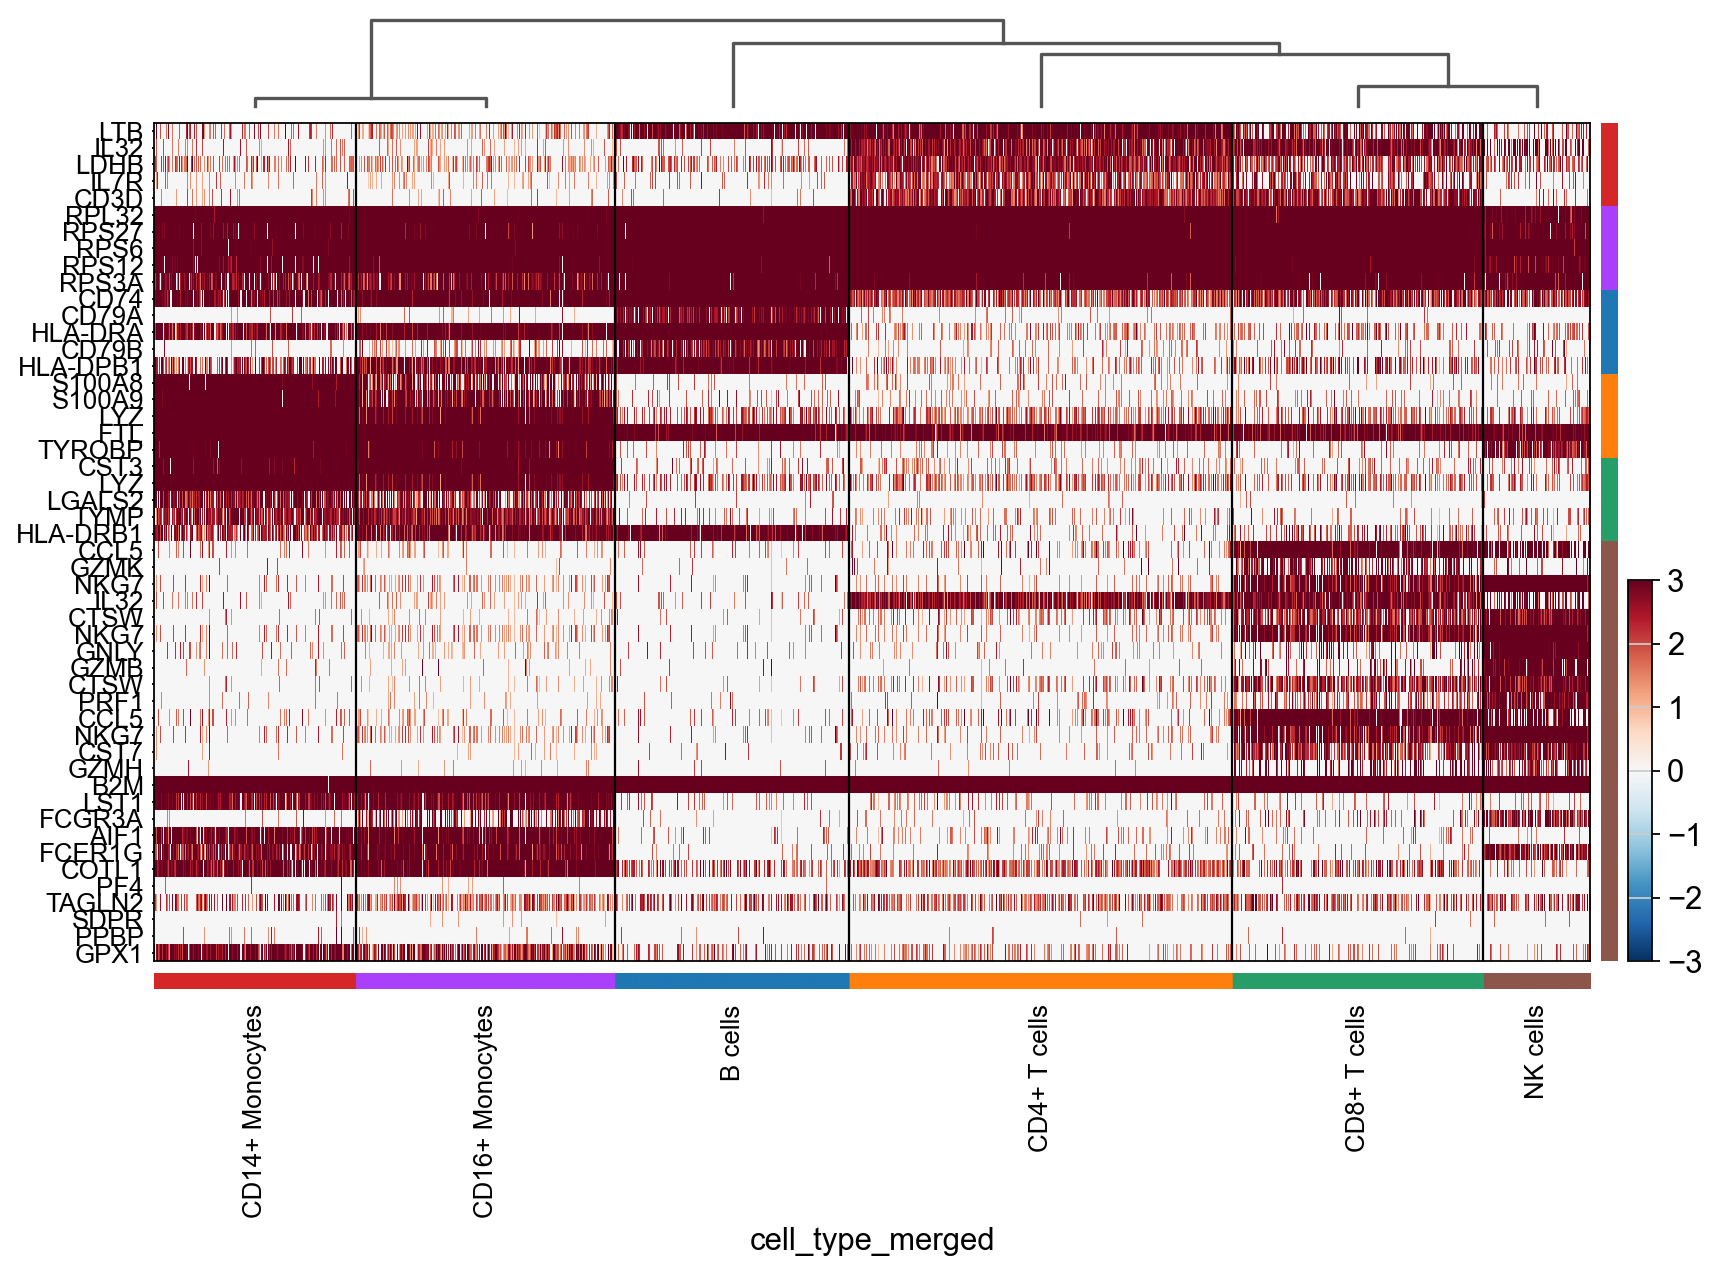

Cell type marker heatmap created


In [17]:
# Heatmap of top markers
sc.pl.rank_genes_groups_heatmap(
    adata,
    n_genes=5,
    groupby='cell_type_merged',
    show_gene_labels=True,
    show=False,
    figsize=(12, 8),
    cmap='RdBu_r',
    vmin=-3,
    vmax=3,
    swap_axes=True
)
plt.savefig(f'{results_dir}07_celltype_markers_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

print("Cell type marker heatmap created")

## 5. Dotplot of Key Markers

Compact visualization showing expression and percentage of cells expressing.

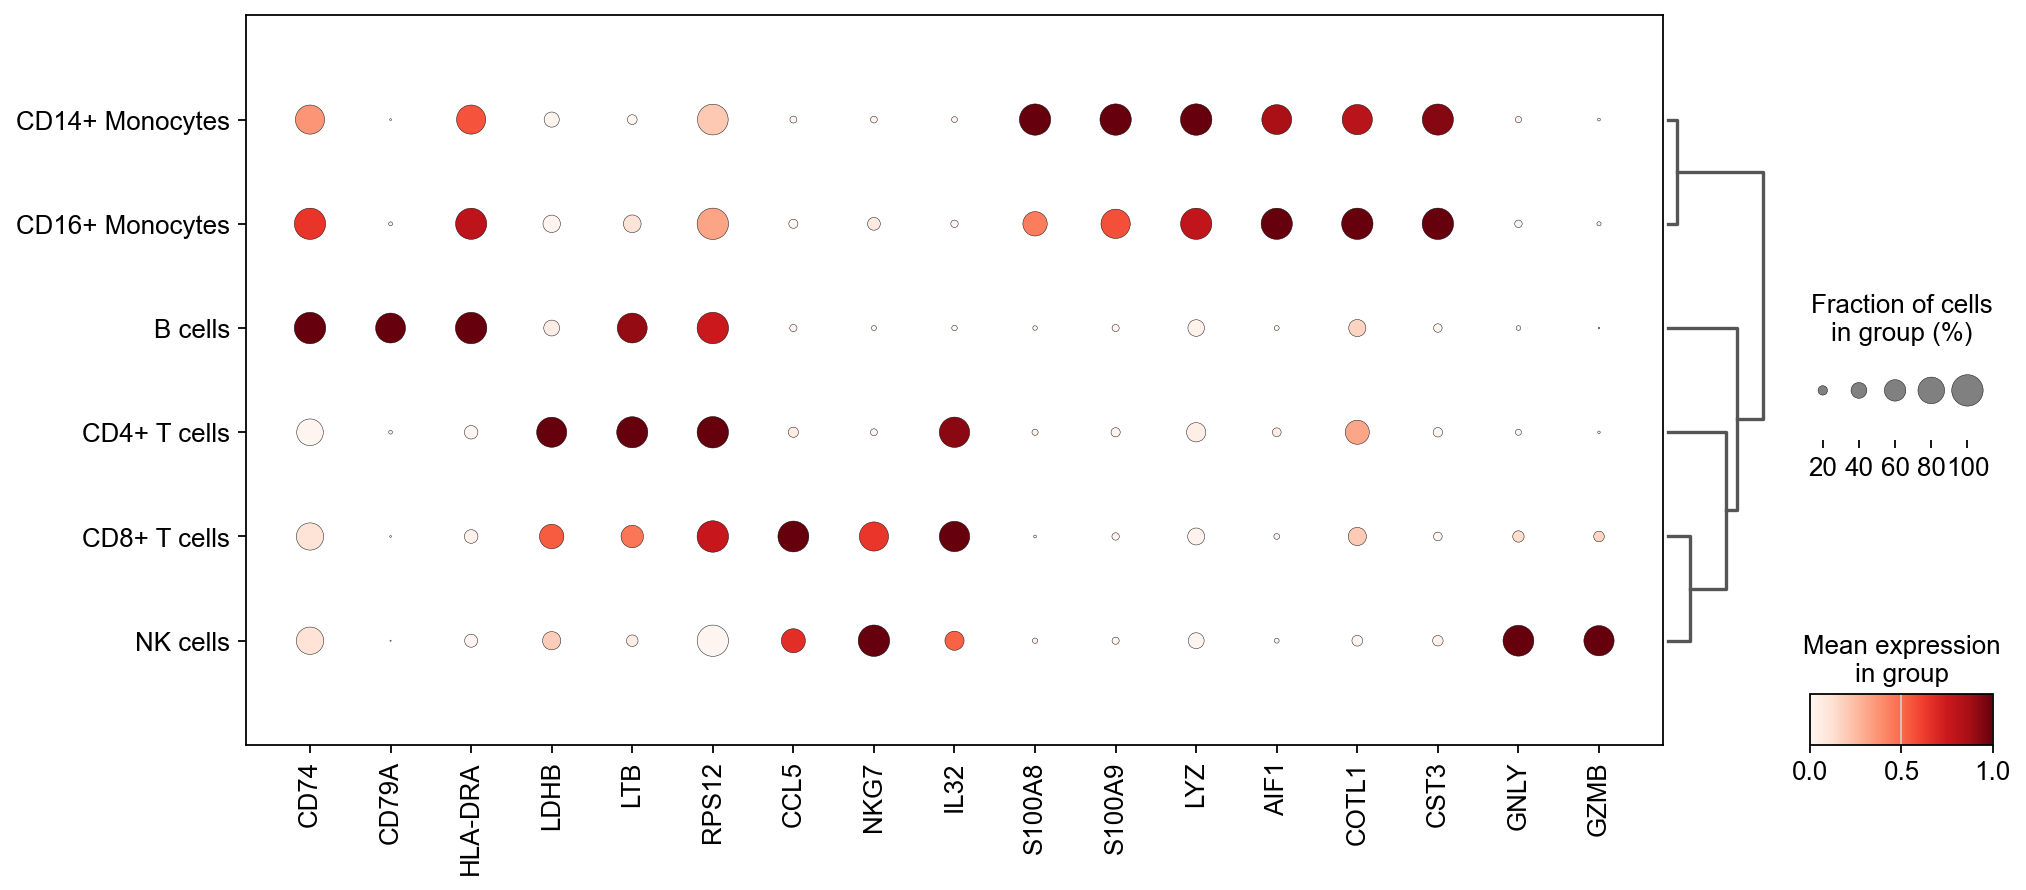

Dotplot with 17 unique markers


In [18]:
# Select top 3 markers per cell type
top_markers = []
for cell_type in groups:
    top_markers.extend(result['names'][cell_type][:3].tolist())

# Remove duplicates
top_markers_unique = list(dict.fromkeys(top_markers))

# Create dotplot
sc.pl.dotplot(
    adata,
    var_names=top_markers_unique,
    groupby='cell_type_merged',
    dendrogram=True,
    show=False,
    figsize=(14, 6),
    standard_scale='var'
)
plt.savefig(f'{results_dir}07_celltype_dotplot.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Dotplot with {len(top_markers_unique)} unique markers")

## 6. Pairwise Comparisons

Compare specific cell types to understand their differences.

### Example: CD4+ vs CD8+ T cells

What genes distinguish these two T cell subtypes?

# Pairwise comparison: CD4+ vs CD8+ T cells
if 'CD4+ T cells' in adata.obs['cell_type_merged'].values and 'CD8+ T cells' in adata.obs['cell_type_merged'].values:
    
    # Subset to T cells only
    t_cells = adata[adata.obs['cell_type_merged'].isin(['CD4+ T cells', 'CD8+ T cells'])].copy()
    
    # Differential expression
    sc.tl.rank_genes_groups(
        t_cells,
        groupby='cell_type_merged',
        groups=['CD4+ T cells'],
        reference='CD8+ T cells',
        method='wilcoxon',
        key_added='cd4_vs_cd8'
    )
    
    print("=" * 60)
    print("CD4+ T CELLS vs CD8+ T CELLS")
    print("=" * 60)
    print("\nTop genes higher in CD4+ T cells:")
    
    result_tcells = t_cells.uns['cd4_vs_cd8']
    genes = result_tcells['names']['CD4+ T cells'][:10]
    logfc = result_tcells['logfoldchanges']['CD4+ T cells'][:10]
    
    for i, (gene, fc) in enumerate(zip(genes, logfc), 1):
        print(f"  {i}. {gene:15s} | LogFC: {fc:6.2f}")
    
    # Visualize
    sc.pl.rank_genes_groups_violin(
        t_cells,
        groups=['CD4+ T cells'],
        n_genes=6,
        key='cd4_vs_cd8',
        show=False
    )
    plt.savefig(f'{results_dir}07_cd4_vs_cd8_violin.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\nCD4+ vs CD8+ comparison complete")
else:
    print("CD4+ or CD8+ T cells not found in dataset")

## 7. Marker Gene Expression on UMAP

Visualize key markers spatially to understand cell type identity.

In [22]:
# Key markers for major cell types
key_markers = {
    'T cells': ['CD3D', 'CD3E'],
    'CD4+ T cells': ['CD4', 'IL7R'],
    'CD8+ T cells': ['CD8A', 'CD8B'],
    'B cells': ['CD79A', 'MS4A1'],
    'NK cells': ['GNLY', 'NKG7'],
    'Monocytes': ['LYZ', 'CD14']
}

# Flatten and filter
all_key_markers = []
for markers in key_markers.values():
    all_key_markers.extend(markers)
available_key_markers = [m for m in all_key_markers if m in adata.var_names]

print(f"Key markers available: {len(available_key_markers)}/{len(all_key_markers)}")

Key markers available: 12/12


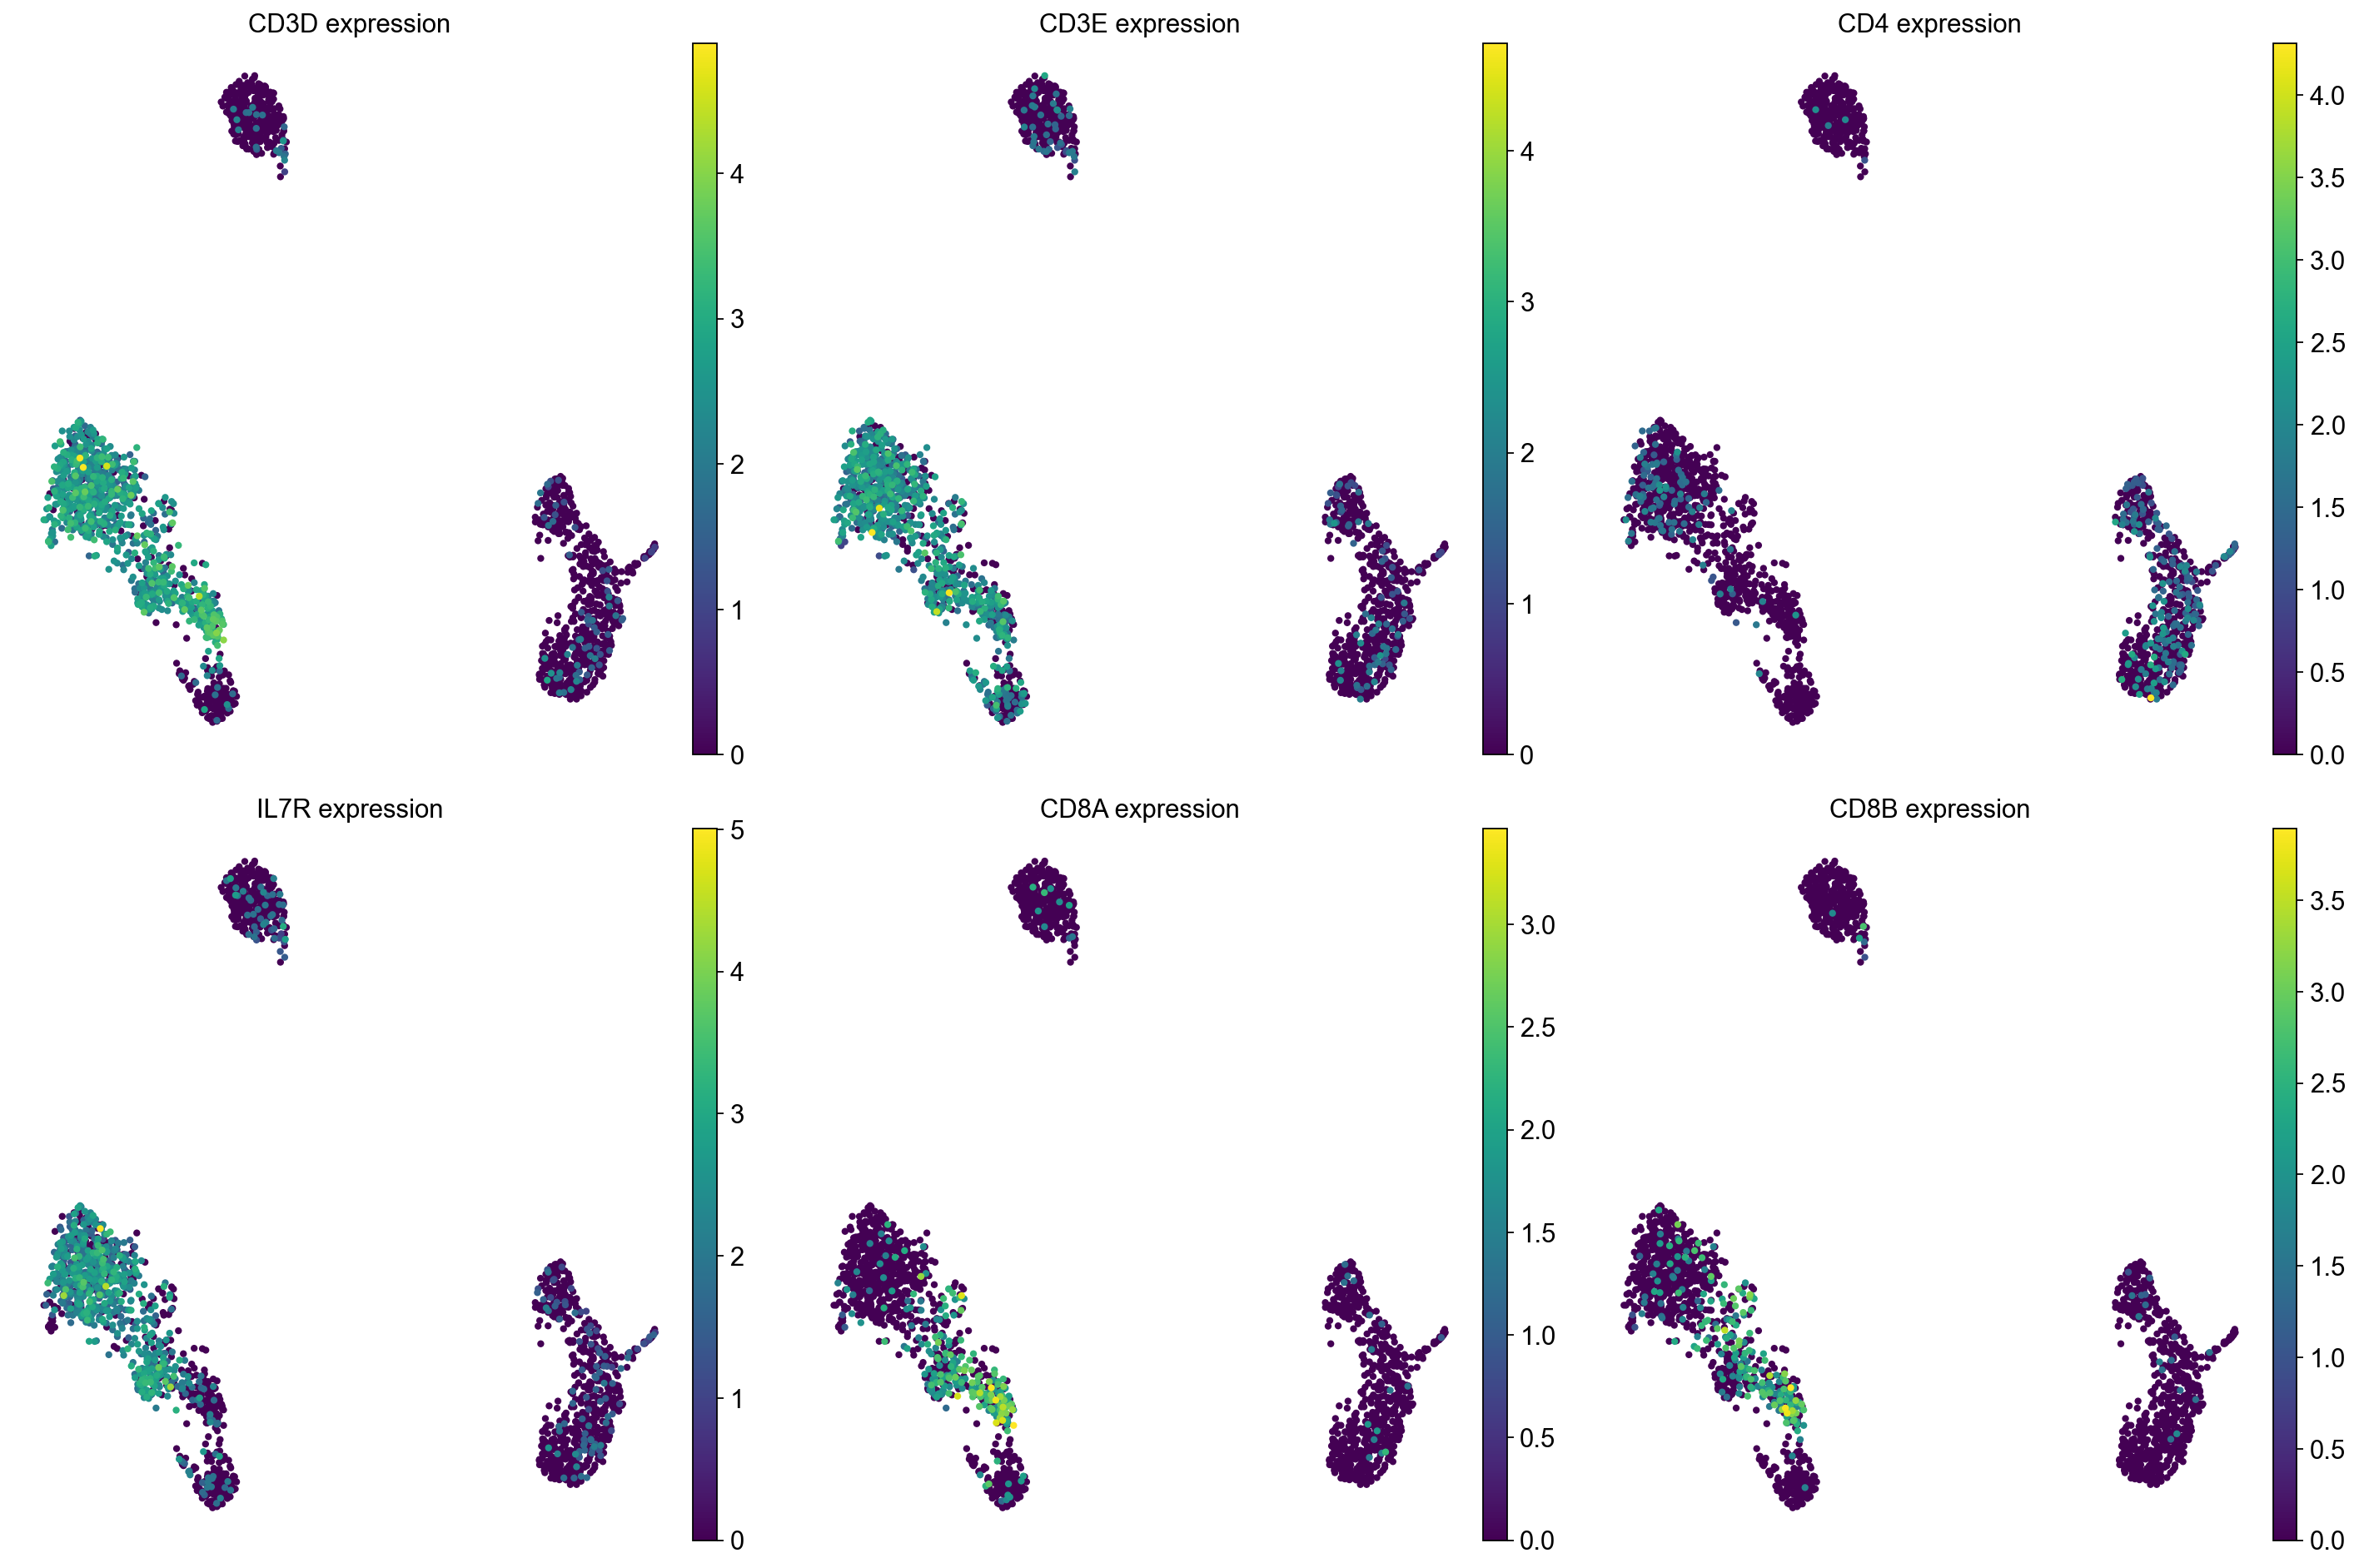

Key markers on UMAP


In [24]:
# Plot key markers on UMAP
if len(available_key_markers) >= 6:
    n_markers = min(6, len(available_key_markers))
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for idx, marker in enumerate(available_key_markers[:n_markers]):
        sc.pl.umap(
            adata,
            color=marker,
            ax=axes[idx],
            show=False,
            cmap='viridis',
            title=f'{marker} expression',
            frameon=False
        )
    
    # Hide unused subplots
    for idx in range(n_markers, 6):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig(f'{results_dir}07_key_markers_umap.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("Key markers on UMAP")

## 8. Stacked Violin Plot

Compact view of marker expression across all cell types.

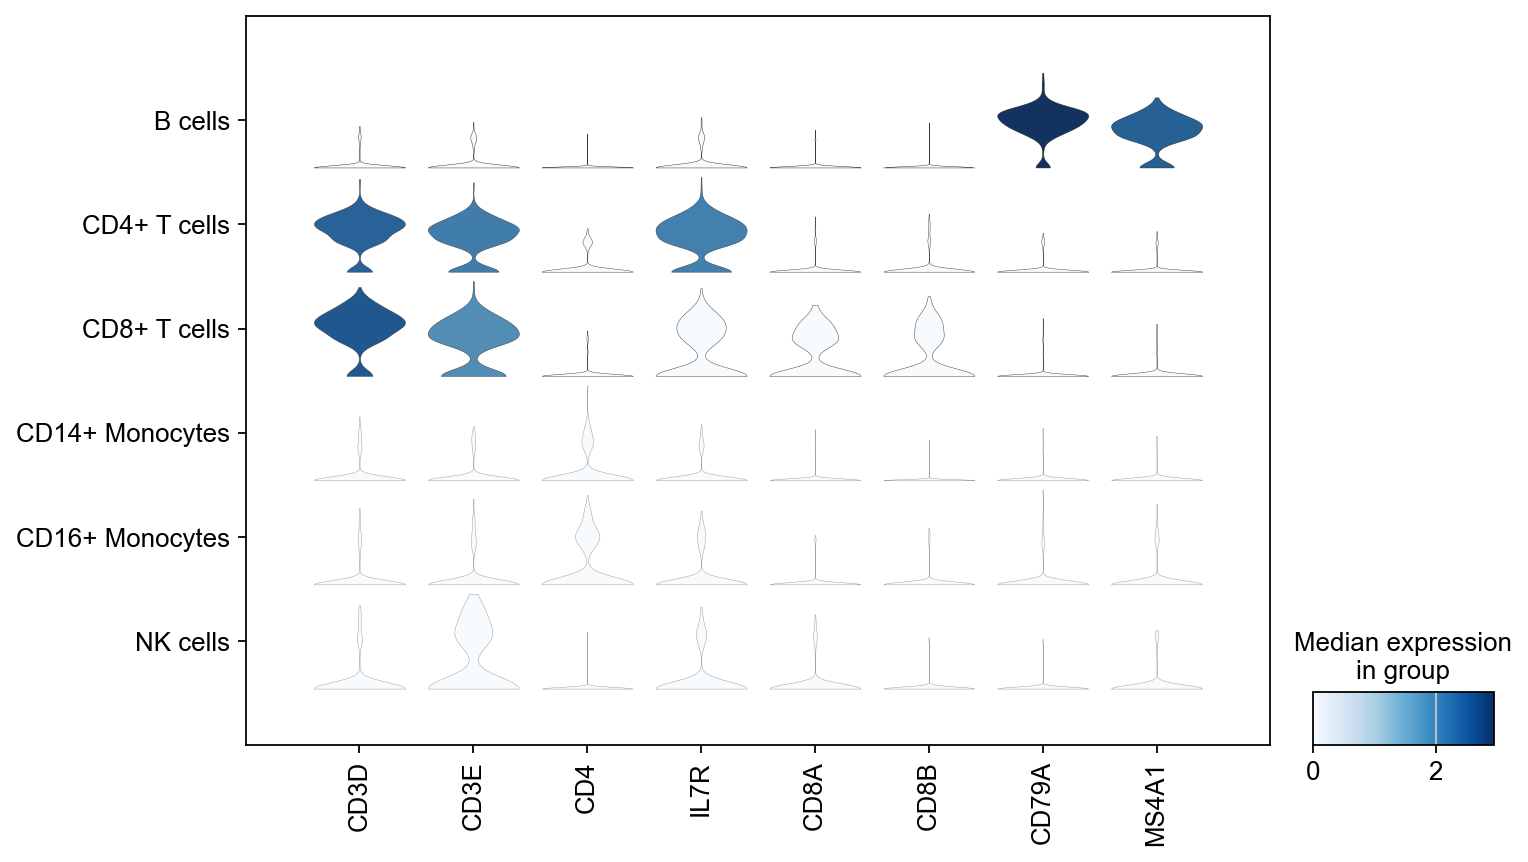

Stacked violin plot created


In [26]:
# Stacked violin plot
if len(available_key_markers) >= 6:
    sc.pl.stacked_violin(
        adata,
        var_names=available_key_markers[:8],
        groupby='cell_type_merged',
        show=False,
        figsize=(10, 6),
        swap_axes=False
    )
    plt.savefig(f'{results_dir}07_stacked_violin.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("Stacked violin plot created")

## 9. Matrix Plot of Canonical Markers

Clean visualization of mean expression for publication.

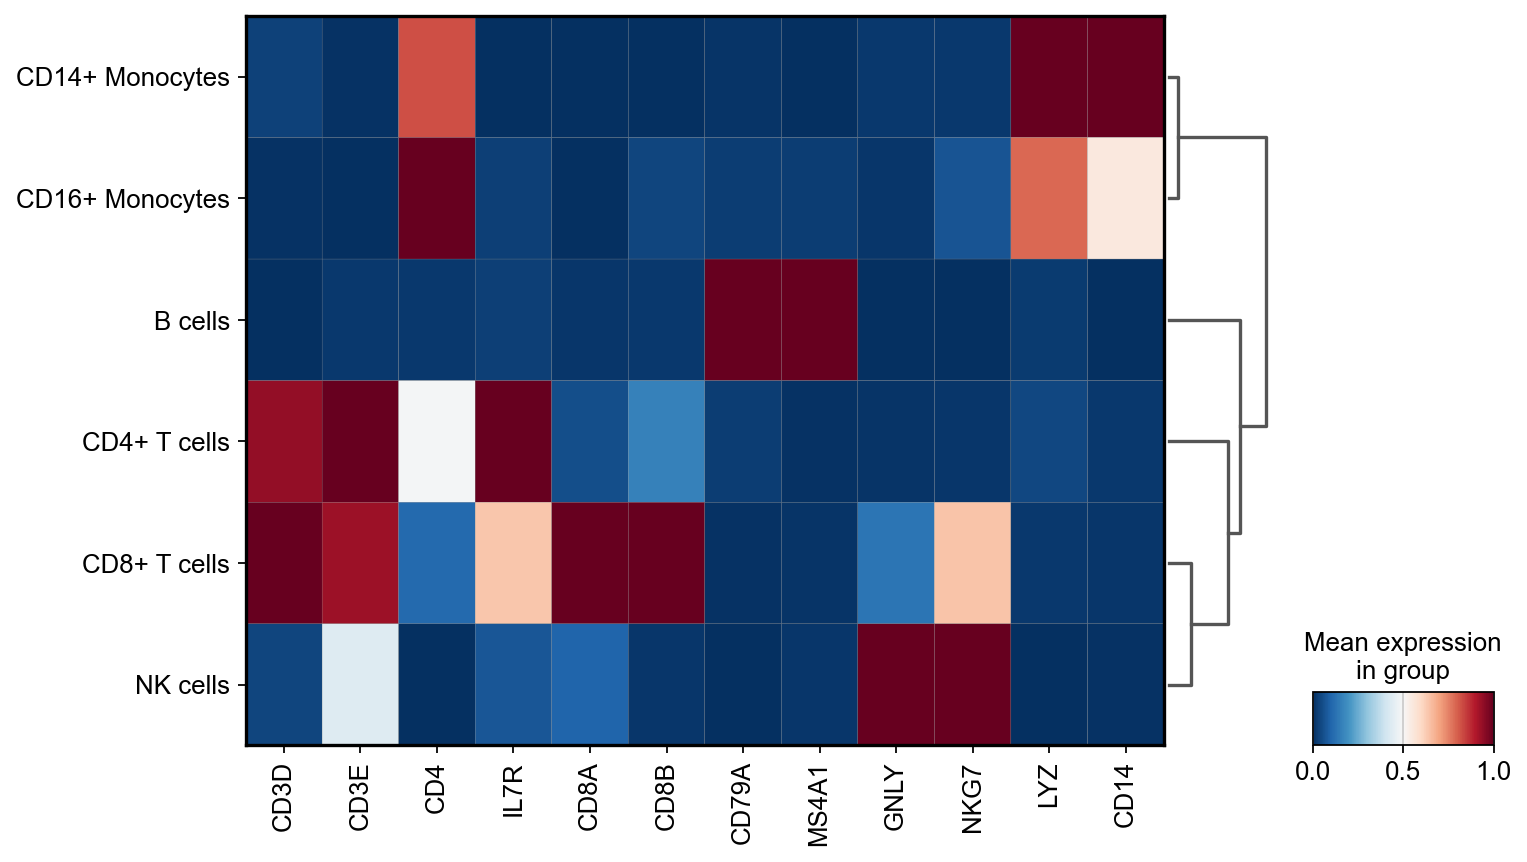

Marker matrix plot created


In [28]:
# Matrix plot
if len(available_key_markers) >= 6:
    sc.pl.matrixplot(
        adata,
        var_names=available_key_markers,
        groupby='cell_type_merged',
        dendrogram=True,
        show=False,
        figsize=(10, 6),
        cmap='RdBu_r',
        standard_scale='var'
    )
    plt.savefig(f'{results_dir}07_marker_matrix.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("Marker matrix plot created")

## 10. Cell Type Proportions Analysis

Understand the composition of your PBMC sample.

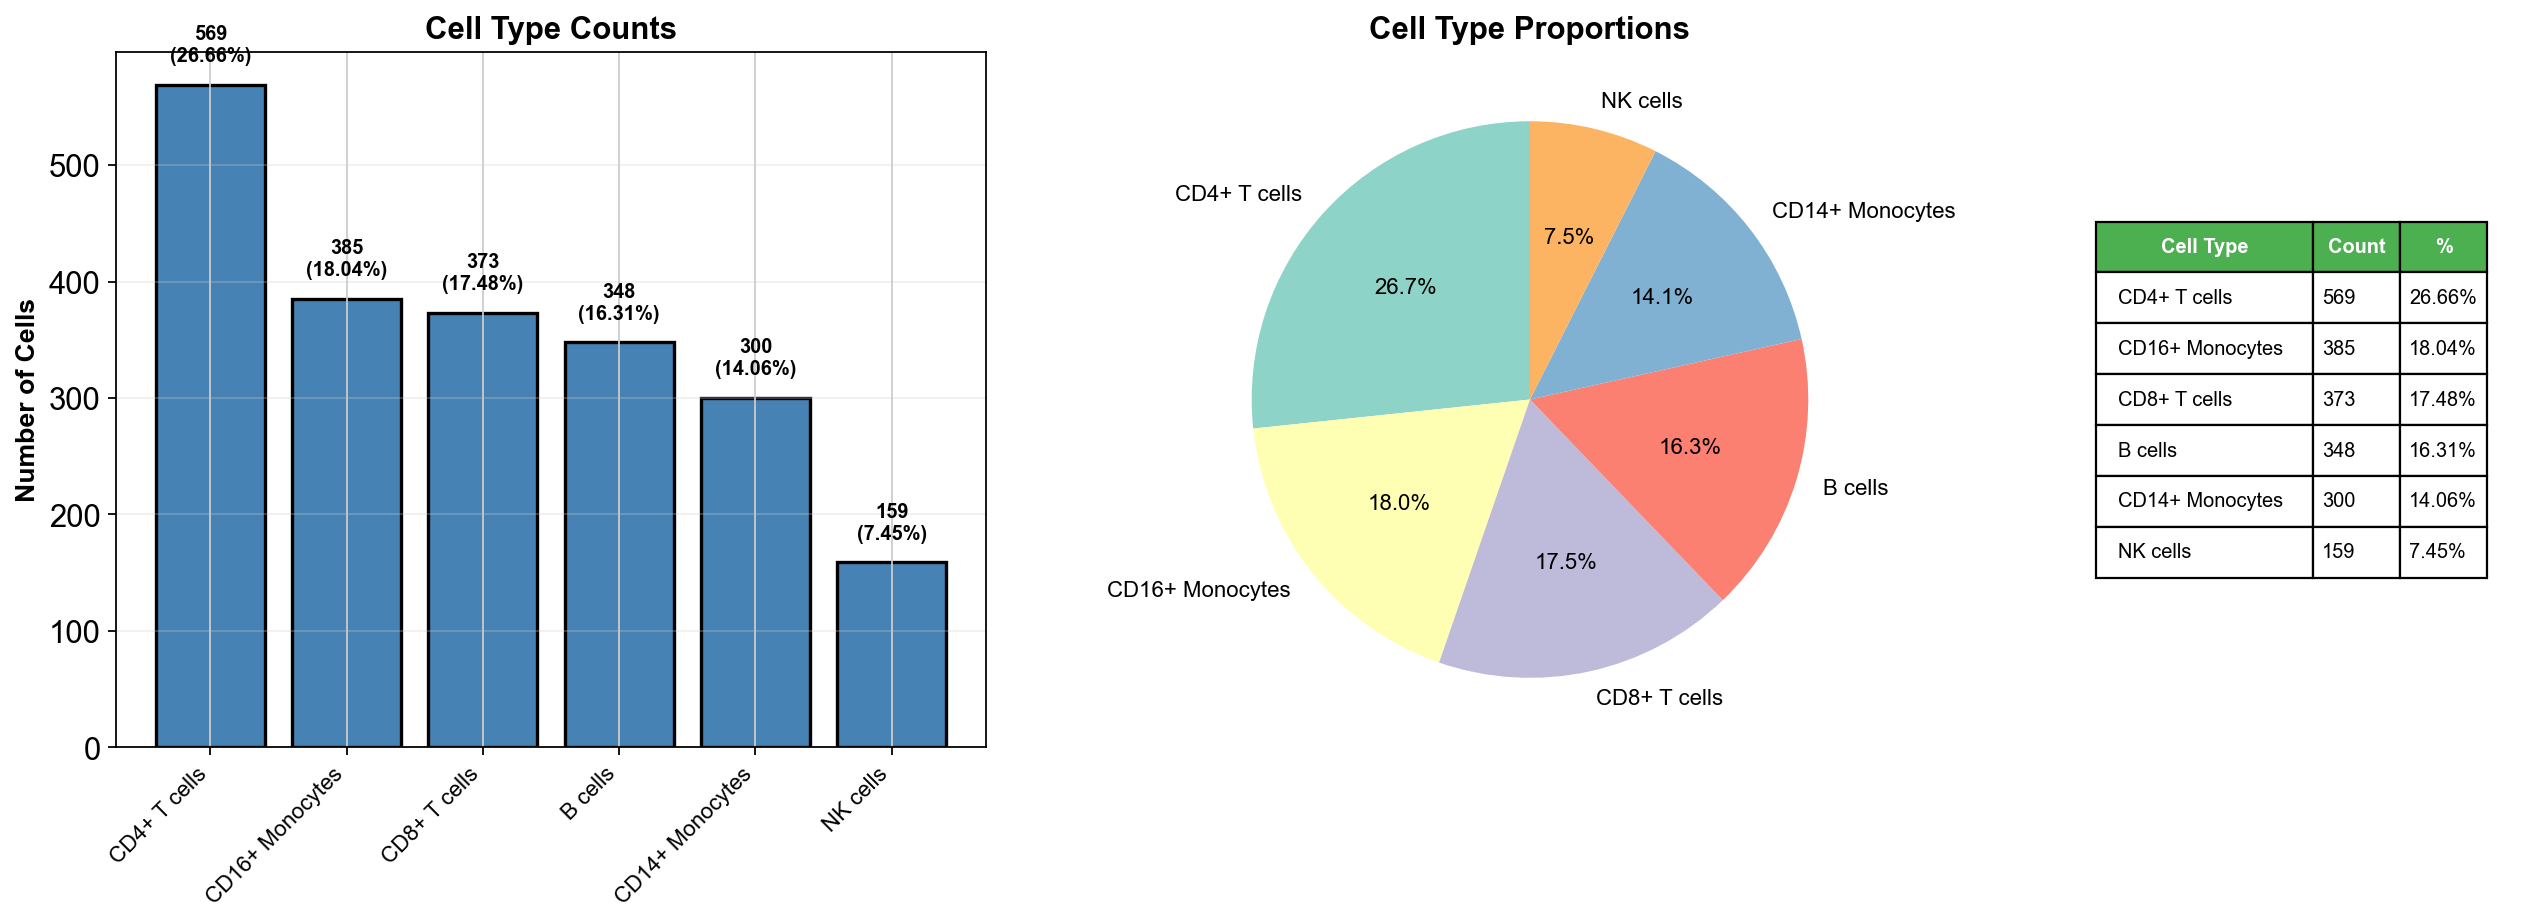

CELL TYPE COMPOSITION SUMMARY
CD4+ T cells             :  569 cells (26.66%)
CD16+ Monocytes          :  385 cells (18.04%)
CD8+ T cells             :  373 cells (17.48%)
B cells                  :  348 cells (16.31%)
CD14+ Monocytes          :  300 cells (14.06%)
NK cells                 :  159 cells ( 7.45%)


In [29]:
# Detailed proportions analysis
cell_counts = adata.obs['cell_type_merged'].value_counts()
cell_proportions = (cell_counts / cell_counts.sum() * 100).round(2)

# Create comprehensive visualization
fig = plt.figure(figsize=(16, 6))
gs = fig.add_gridspec(1, 3, width_ratios=[2, 2, 1])

# Bar plot with percentages
ax1 = fig.add_subplot(gs[0])
bars = ax1.bar(range(len(cell_counts)), cell_counts.values, color='steelblue', edgecolor='black', linewidth=1.5)
ax1.set_xticks(range(len(cell_counts)))
ax1.set_xticklabels(cell_counts.index, rotation=45, ha='right', fontsize=10)
ax1.set_ylabel('Number of Cells', fontsize=12, fontweight='bold')
ax1.set_title('Cell Type Counts', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add count and percentage labels
for i, (count, pct) in enumerate(zip(cell_counts.values, cell_proportions.values)):
    ax1.text(i, count + 20, f'{count}\n({pct}%)', ha='center', fontsize=9, fontweight='bold')

# Pie chart
ax2 = fig.add_subplot(gs[1])
colors = plt.cm.Set3(range(len(cell_counts)))
wedges, texts, autotexts = ax2.pie(
    cell_counts.values,
    labels=cell_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)
ax2.set_title('Cell Type Proportions', fontsize=14, fontweight='bold')

# Table
ax3 = fig.add_subplot(gs[2])
ax3.axis('off')

table_data = []
for cell_type, count in cell_counts.items():
    pct = cell_proportions[cell_type]
    table_data.append([cell_type, count, f'{pct}%'])

table = ax3.table(
    cellText=table_data,
    colLabels=['Cell Type', 'Count', '%'],
    cellLoc='left',
    loc='center',
    colWidths=[0.5, 0.2, 0.2]
)
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style header
for i in range(3):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

plt.tight_layout()
plt.savefig(f'{results_dir}07_cell_proportions_comprehensive.png', dpi=150, bbox_inches='tight')
plt.show()

print("=" * 60)
print("CELL TYPE COMPOSITION SUMMARY")
print("=" * 60)
for cell_type, count in cell_counts.items():
    prop = cell_proportions[cell_type]
    print(f"{cell_type:25s}: {count:4d} cells ({prop:5.2f}%)")

## 11. Export Results

Save differential expression results and summaries for reporting.

In [31]:
# Export top markers per cell type
marker_results = []
result = adata.uns['rank_genes_celltype']

for cell_type in groups:
    genes = result['names'][cell_type][:20]
    scores = result['scores'][cell_type][:20]
    logfc = result['logfoldchanges'][cell_type][:20]
    pvals = result['pvals'][cell_type][:20]
    pvals_adj = result['pvals_adj'][cell_type][:20]
    
    for gene, score, fc, pval, pval_adj in zip(genes, scores, logfc, pvals, pvals_adj):
        marker_results.append({
            'cell_type': cell_type,
            'gene': gene,
            'score': score,
            'logfoldchange': fc,
            'pval': pval,
            'pval_adj': pval_adj
        })

# Create DataFrame
marker_df = pd.DataFrame(marker_results)

# Save to CSV
marker_df.to_csv(f'{results_dir}07_celltype_markers.csv', index=False)

print("✅ Cell type markers exported!")
print(f"File: {results_dir}07_celltype_markers.csv")
print(f"Total markers: {len(marker_df)}")

✅ Cell type markers exported!
File: ../results/07_celltype_markers.csv
Total markers: 120


In [32]:
# Export cell type summary
summary_data = {
    'Cell Type': cell_counts.index.tolist(),
    'Count': cell_counts.values.tolist(),
    'Percentage': cell_proportions.values.tolist()
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv(f'{results_dir}07_celltype_summary.csv', index=False)

print("✅ Cell type summary exported!")
print(f"File: {results_dir}07_celltype_summary.csv")

✅ Cell type summary exported!
File: ../results/07_celltype_summary.csv


## Summary

### What we accomplished:

1. **Loaded annotated data** with 6 cell types
2. **Performed differential expression** between cell types
3. **Identified cell type-specific markers**
4. **Created comprehensive visualizations**:
   - UMAP overview with QC metrics
   - Marker heatmaps
   - Dotplots
   - Violin plots
   - Matrix plots
   - Stacked violins
5. **Pairwise comparisons** (CD4+ vs CD8+ T cells)
6. **Analyzed cell type proportions**
7. **Exported results** for reporting

---

### Key Biological Insights

#### **T Cell Subtypes**
- **CD4+ T cells**: Express IL7R, CD4 → Helper T cells
- **CD8+ T cells**: Express CD8A, CD8B, cytotoxic markers → Killer T cells
- **Functional difference**: CD4+ help immune response, CD8+ kill infected cells

#### **Innate Immunity**
- **NK cells**: High GNLY, GZMB, PRF1 → Cytotoxic, no antigen specificity
- **Monocytes**: High LYZ, phagocytic → First responders to infection
  - **CD14+ (Classical)**: S100A8/A9 high → Pro-inflammatory
  - **CD16+ (Non-classical)**: FCGR3A+ → Patrolling, anti-inflammatory

#### **Adaptive Immunity**
- **B cells**: CD79A/B, MS4A1 → Antibody production, antigen presentation

---

### Sample Composition

Your PBMC sample shows **healthy immune cell distribution**:
- Majority T cells (CD4+ and CD8+) → Adaptive immunity
- Significant monocyte population → Innate immunity
- B cells and NK cells present → Complete immune repertoire

**This matches expected healthy PBMC composition!** ✅

---

### 🎯 Biological Interpretation

**What we learned**:
1. ✅ Each cell type has **distinct molecular signature**
2. ✅ Markers align with **known biology** (CD3D for T cells, CD79A for B cells)
3. ✅ Cell proportions are **biologically reasonable**
4. ✅ Pairwise comparisons reveal **functional specialization**

---

### Next Steps: Notebook 08 - Advanced Analysis

Potential advanced analyses:
1. **Trajectory inference**: Cell differentiation paths
2. **Cell cycle analysis**: Proliferating cells
3. **Gene regulatory networks**: Transcription factor analysis
4. **Cell-cell communication**: Ligand-receptor interactions
5. **Integration with other datasets**: Batch correction, meta-analysis

---

**Congratulations! You've completed a full single-cell RNA-seq analysis pipeline!**

**From raw counts to biological insights** → You now understand what makes each cell type unique! 🧬